In [14]:
# For data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text analysis
from wordcloud import WordCloud
from textblob import TextBlob

In [16]:
pip install pandas numpy matplotlib seaborn wordcloud textblob

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Load US trending video dataset
data = pd.read_csv('USvideos.csv')

# View the first 5 rows
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [20]:
# Check for missing values
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [22]:
# Convert trending_date (format is 'yy.dd.mm')
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')

# Convert publish_time to datetime
data['publish_time'] = pd.to_datetime(data['publish_time'])

In [24]:
# Extract useful time-based columns
data['publish_day'] = data['publish_time'].dt.day_name()
data['publish_hour'] = data['publish_time'].dt.hour
data['trending_weekday'] = data['trending_date'].dt.day_name()

# See the updated data
data[['publish_day', 'publish_hour', 'trending_weekday']].head()

,publish_day,publish_hour,trending_weekday
0,Monday,17,Tuesday
1,Monday,7,Tuesday
2,Sunday,19,Tuesday
3,Monday,11,Tuesday
4,Sunday,18,Tuesday


In [26]:
data[['views', 'likes', 'dislikes', 'comment_count']].describe()

,views,likes,dislikes,comment_count
count,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [28]:
# How many unique channels?
print("Unique Channels:", data['channel_title'].nunique())

# How many categories (category_id is numeric; category names are in another file)
print("Unique Categories:", data['category_id'].nunique())

Unique Channels: 2207
Unique Categories: 16


In [30]:
data['channel_title'].value_counts().head(10)

channel_title
ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: count, dtype: int64

In [32]:
## visualization:

In [38]:
#1. Distribution of Views

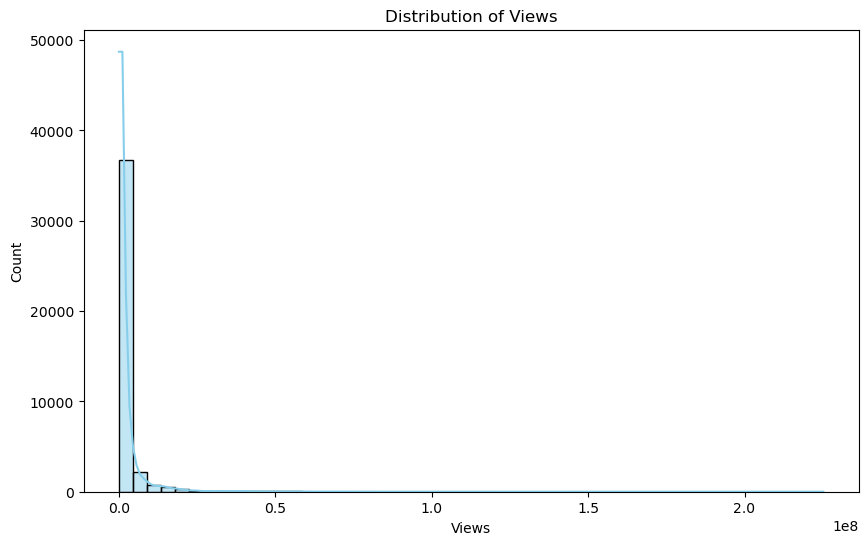

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data['views'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Count')
plt.show()

In [42]:
# 2. Distribution of Likes

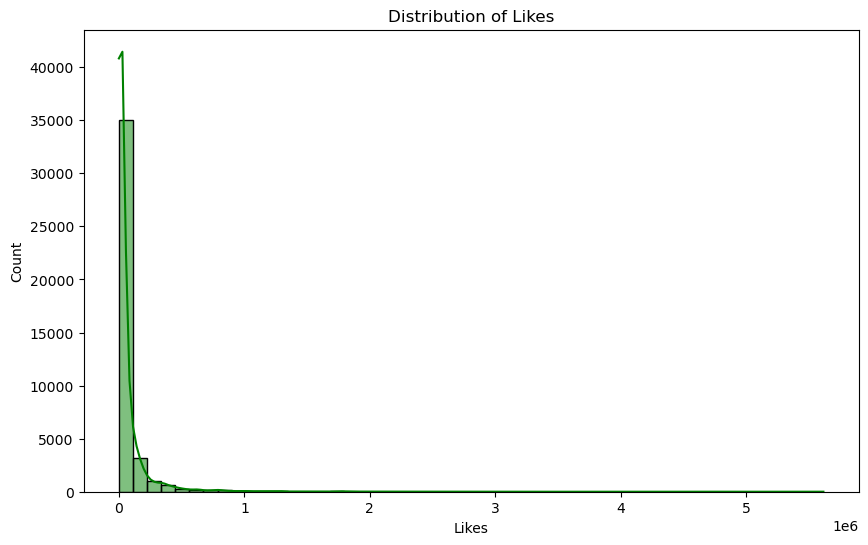

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data['likes'], bins=50, kde=True, color='green')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show()

In [46]:
# 3. Top 10 Trending Channels

/var/folders/fp/hhn7s8v11t38d1j_yr3spp940000gn/T/ipykernel_91513/763397526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='viridis')


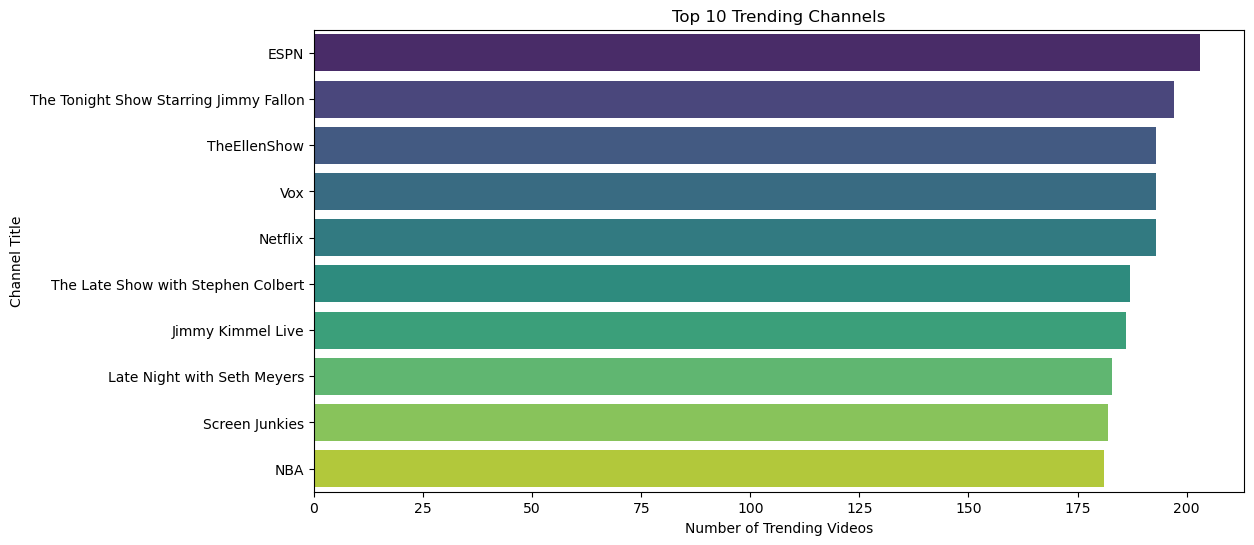

In [48]:
top_channels = data['channel_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='viridis')
plt.title('Top 10 Trending Channels')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel Title')
plt.show()

In [50]:
# 4. Publish Hour Analysis: Which Time Videos are Published?

/var/folders/fp/hhn7s8v11t38d1j_yr3spp940000gn/T/ipykernel_91513/2240875586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=data, palette='coolwarm')


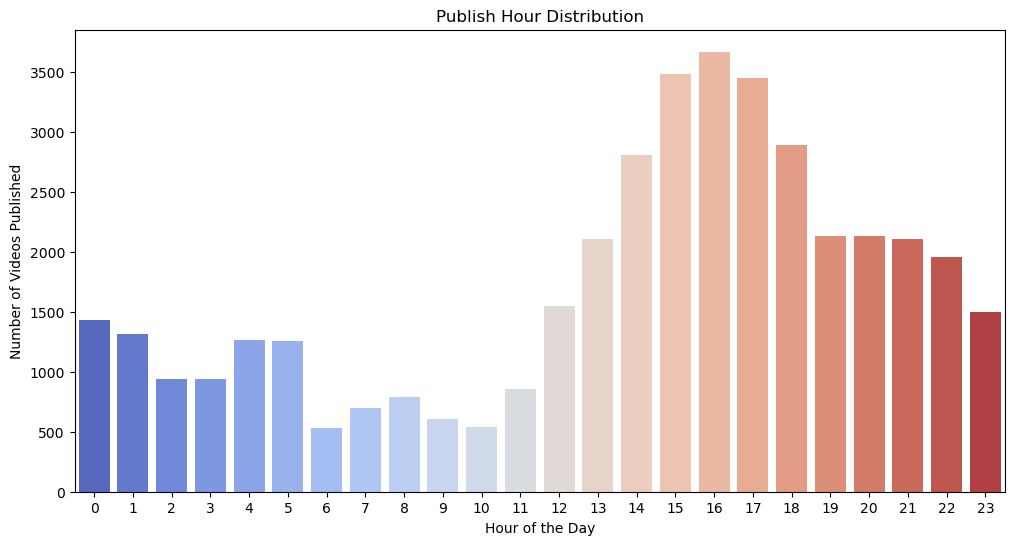

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=data, palette='coolwarm')
plt.title('Publish Hour Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Published')
plt.show()

In [54]:
# 5. Trending Day Analysis

/var/folders/fp/hhn7s8v11t38d1j_yr3spp940000gn/T/ipykernel_91513/861496907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trending_weekday', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')


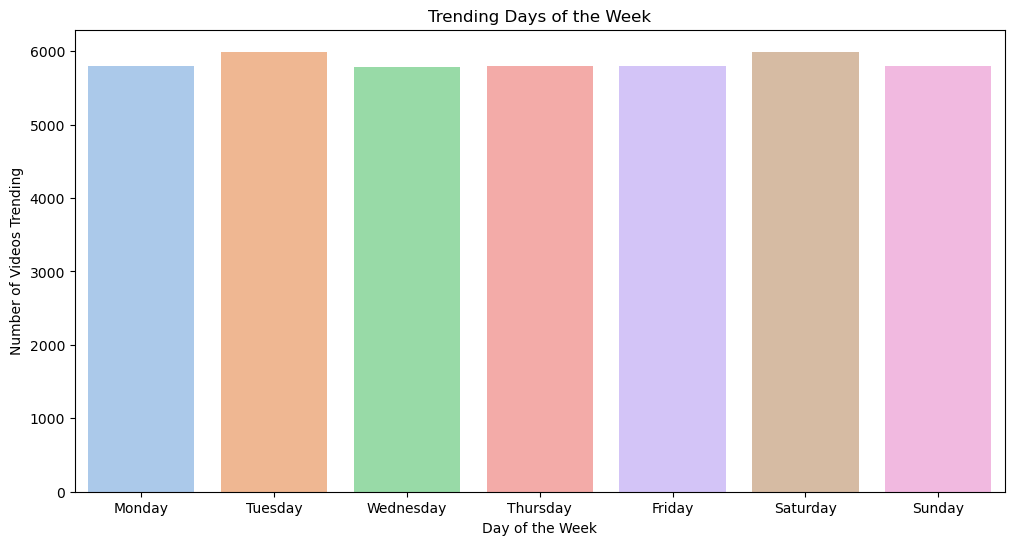

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='trending_weekday', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')
plt.title('Trending Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Trending')
plt.show()

In [68]:
## Text Analysis:

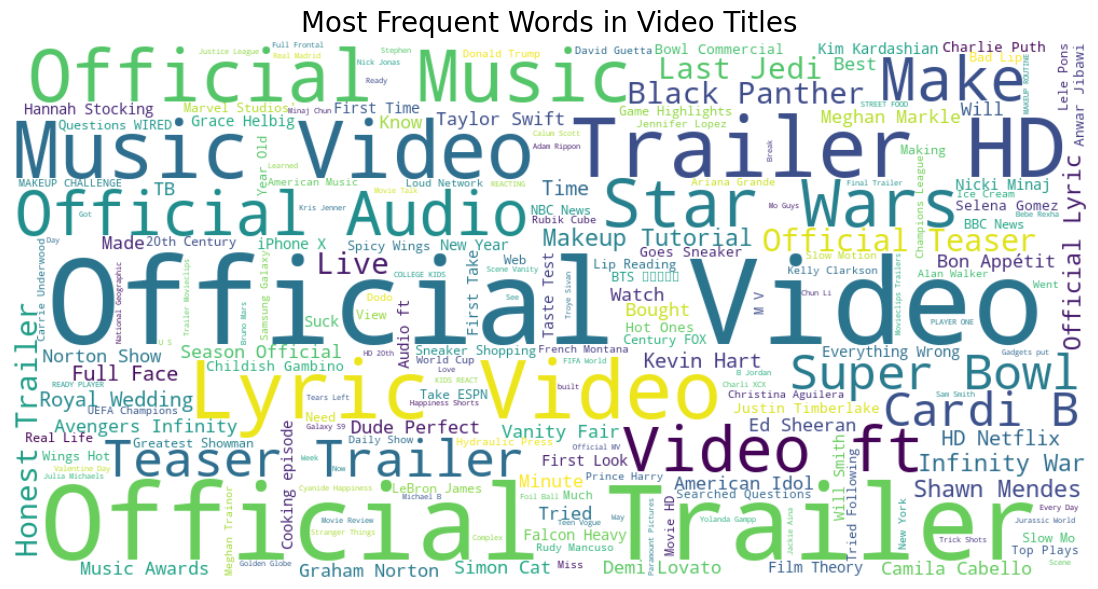

In [60]:
from wordcloud import WordCloud

# Combine all titles into a single string
title_text = " ".join(data['title'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(title_text)

# Plot the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Video Titles', fontsize=20)
plt.show()

In [62]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply to title column
data['title_sentiment'] = data['title'].apply(get_sentiment)

# Show first few results
data[['title', 'title_sentiment']].head()


,title,title_sentiment
0,WE WANT TO TALK ABOUT OUR MARRIAGE,0.00
1,The Trump Presidency: Last Week Tonight with J...,0.00
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",0.00
3,Nickelback Lyrics: Real or Fake?,-0.75
4,I Dare You: GOING BALD!?,0.00


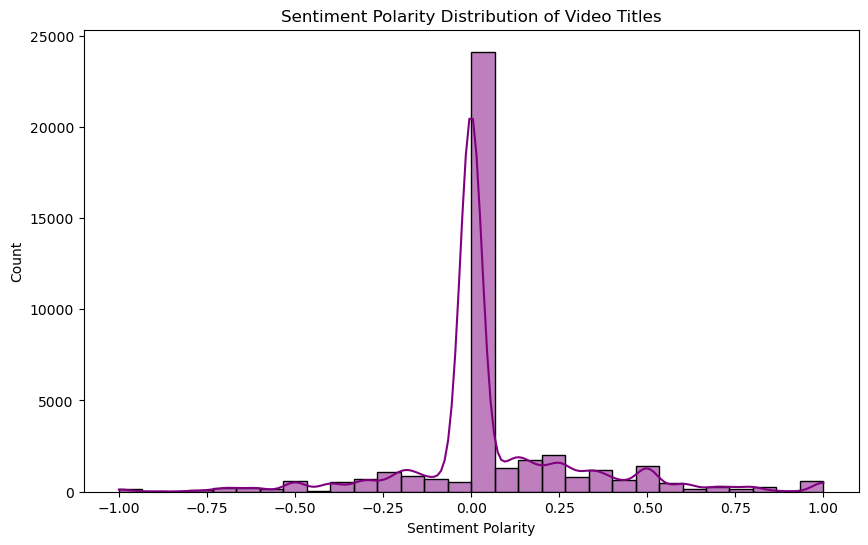

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data['title_sentiment'], bins=30, color='purple', kde=True)
plt.title('Sentiment Polarity Distribution of Video Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

/var/folders/fp/hhn7s8v11t38d1j_yr3spp940000gn/T/ipykernel_91513/3689595488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publish_day', y='title_sentiment', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Spectral')


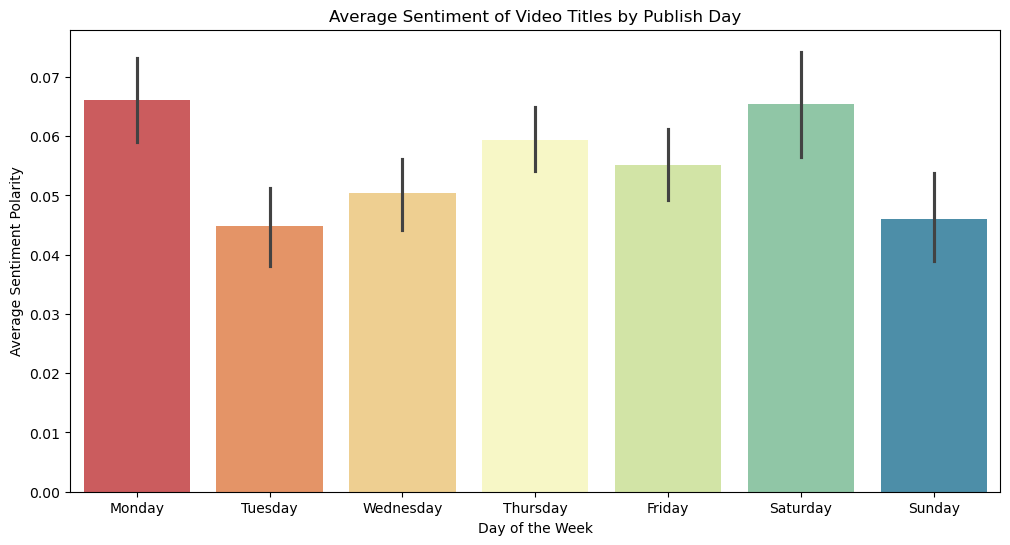

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='publish_day', y='title_sentiment', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Spectral')
plt.title('Average Sentiment of Video Titles by Publish Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sentiment Polarity')
plt.show()

In [70]:
data.to_csv('youtube_cleaned_data.csv', index=False)

In [72]:
## Export, Dashboard, and Documentation

In [74]:
data.to_csv('youtube_trending_cleaned.csv', index=False)

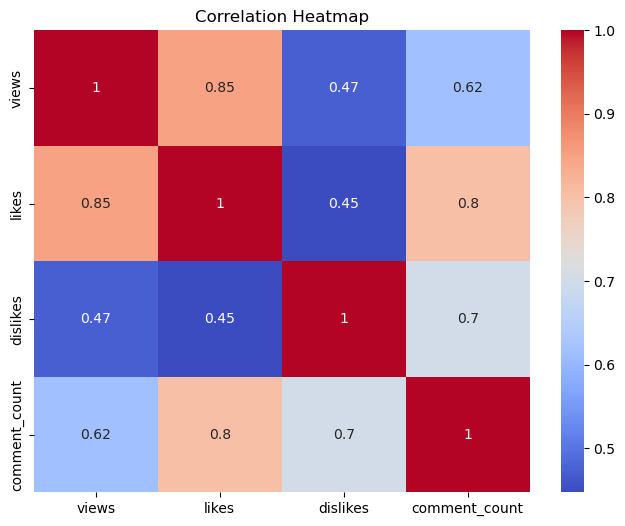

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()